In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('winequality-white.csv')
data.describe()

data = data.ffill()

data.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4


<Axes: >

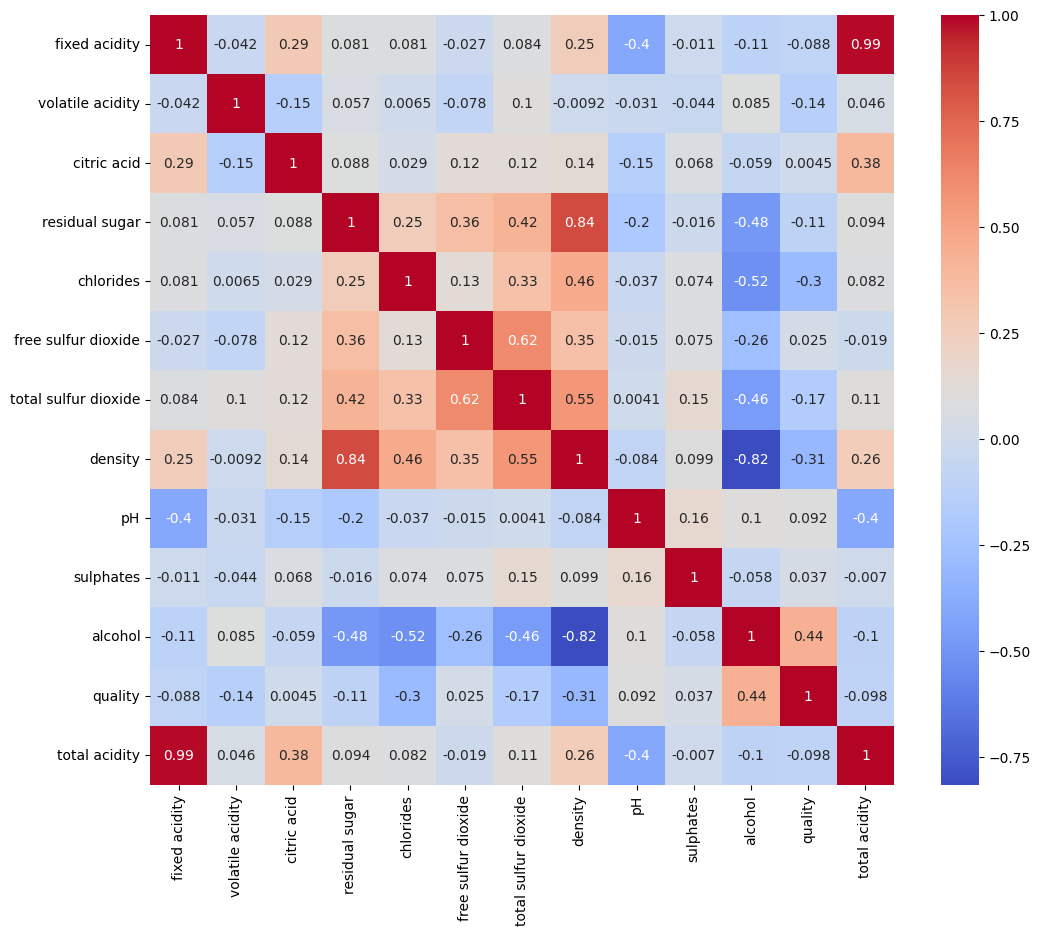

In [15]:
#Statistical Analysis and cleanup
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


data = data[(np.abs(stats.zscore(data['fixed acidity'])) < 3)]
data = data[(np.abs(stats.zscore(data['volatile acidity'])) < 3)]
data = data[(np.abs(stats.zscore(data['citric acid'])) < 3)]
data = data[(np.abs(stats.zscore(data['residual sugar'])) < 3)]
data = data[(np.abs(stats.zscore(data['chlorides'])) < 3)]
data = data[(np.abs(stats.zscore(data['free sulfur dioxide'])) < 3)]
data = data[(np.abs(stats.zscore(data['total sulfur dioxide'])) < 3)]
data = data[(np.abs(stats.zscore(data['density'])) < 3)]
data = data[(np.abs(stats.zscore(data['pH'])) < 3)]
data = data[(np.abs(stats.zscore(data['alcohol'])) < 3)]
data = data[(np.abs(stats.zscore(data['sulphates'])) < 3)]
data['total acidity'] = data['fixed acidity'] + data['volatile acidity'] + data['citric acid']

corrmat = data.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [16]:
Y = data['quality']
X = data.drop('quality', axis=1)

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(max_depth=3, random_state=42)


# Perform 10-fold cross-validation
cv_scores = cross_val_score(DT, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max Decision Tree score: {cv_scores.max()}")


Max Decision Tree score: 0.5825892857142857


C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


In [18]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
# 
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max KNN score: {cv_scores.max()}")


C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Max KNN score: 0.5357142857142857


In [19]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Find best parameters using Hyperparameter Tuning

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
#                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_scaled, Y)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(best_params,best_score)
# implement best_params

svc = SVC(C=10, gamma='scale', kernel= 'rbf')
cv_scores = cross_val_score(svc, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max SVC score: {cv_scores.max()}")


C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Max SVC score: 0.5915178571428571


In [20]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier, StackingClassifier

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('scaler', StandardScaler(), [0, 1, 2, 3,4,5,6,7,8,9,10,11]),  # Scale all features for SVC and KNN
#         ('none', 'passthrough', [0, 1, 2, 3,4,5,6,7,8,9,10,11]), # Pass through the original features for Decision Tree
#     ]
# )

# base_models = [
#     ('svc', Pipeline(steps=[('preprocessor', preprocessor), ('svc', SVC(C=10, gamma='scale', kernel= 'rbf',probability=True))])),
#     ('decision_tree', DecisionTreeClassifier()),
#     ('knn', Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier())]))
# ]

# # Create the meta-model
# meta_model = RandomForestClassifier(n_estimators=50)

# stacked_pipeline = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model,
#     cv=10
# )

# cv_scores = cross_val_score(stacked_pipeline, X, Y, cv=10)

# # Output the cross-validation scores for each fold
# print(f"Max stacked pipleine score: {cv_scores.max()}")
